In [37]:
import pandas as pd
import numpy as np

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
%matplotlib inline

In [40]:
df = pd.read_csv('cleaned').drop(columns='Unnamed: 0',axis=1)

In [41]:
df.head()

,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category,lat,lon
0,C-BAG-27-031,KathmanduN.P.,Kathmandu,Central,2.17,10.00,8.86,1.82,5.34,4.88,10.0000,Highest,27.694114,85.288318
1,C-BAG-25-027,LalitpurN.P.,Lalitpur,Central,1.72,2.26,8.40,0.82,4.61,2.62,5.3707,Highest,27.548292,85.322938
2,C-NAR-35-005,BharatpurN. P.,Chitawan,Central,2.21,1.47,5.38,2.53,3.96,2.34,4.8083,Highest,27.750329,85.332849
3,C-BAG-26-012,MadhyapurThimiN.P.,Bhaktapur,Central,2.45,0.85,8.23,0.89,4.56,2.12,4.3447,Highest,27.704332,85.452118
4,C-BAG-27-028,Jorpati,Kathmandu,Central,1.91,0.87,8.86,1.82,5.34,2.07,4.2407,Highest,27.694114,85.288318


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   P_CODE               3985 non-null   object 
 1   VDC_NAME             3985 non-null   object 
 2   DISTRICT             3985 non-null   object 
 3   REGION               3985 non-null   object 
 4   Hazard (Intensity)   3985 non-null   float64
 5   Exposure             3985 non-null   float64
 6   Housing              3985 non-null   float64
 7   Poverty              3985 non-null   float64
 8   Vulnerability        3985 non-null   float64
 9   Severity             3985 non-null   float64
 10  Severity Normalized  3985 non-null   float64
 11  Severity category    3985 non-null   object 
 12  lat                  3985 non-null   float64
 13  lon                  3985 non-null   float64
dtypes: float64(9), object(5)
memory usage: 436.0+ KB


In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hazard (Intensity),3985.0,0.320537,0.779937,0.000000,0.000000,0.010000,0.130000,10.000000
Exposure,3985.0,0.067493,0.187551,0.000000,0.030000,0.050000,0.070000,10.000000
Housing,3985.0,5.706522,1.953037,1.170000,4.640000,5.610000,6.850000,9.940000
Poverty,3985.0,5.481854,2.270975,0.000000,3.330000,5.620000,7.350000,10.000000
Vulnerability,3985.0,5.594635,1.450817,1.620000,4.590000,5.550000,6.660000,8.830000
Severity,3985.0,0.248720,0.298756,0.000000,0.050000,0.140000,0.360000,4.880000
Severity Normalized,3985.0,0.510221,0.612652,0.000000,0.094100,0.286200,0.744800,10.000000
lat,3985.0,27.750966,6.791722,-14.351485,27.000000,27.653764,28.356247,51.340468
lon,3985.0,79.564143,23.679388,-75.170787,82.849442,85.164780,86.126179,102.186311


<Axes: xlabel='Severity category', ylabel='count'>

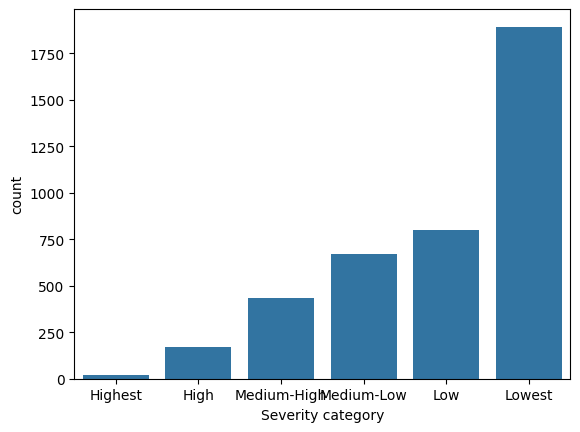

In [44]:
sns.countplot(x='Severity category',data=df)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()

In [47]:
df['severity_cat'] = le.fit_transform(df['Severity category'])

In [48]:
df.head()

,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category,lat,lon,severity_cat
0,C-BAG-27-031,KathmanduN.P.,Kathmandu,Central,2.17,10.00,8.86,1.82,5.34,4.88,10.0000,Highest,27.694114,85.288318,1
1,C-BAG-25-027,LalitpurN.P.,Lalitpur,Central,1.72,2.26,8.40,0.82,4.61,2.62,5.3707,Highest,27.548292,85.322938,1
2,C-NAR-35-005,BharatpurN. P.,Chitawan,Central,2.21,1.47,5.38,2.53,3.96,2.34,4.8083,Highest,27.750329,85.332849,1
3,C-BAG-26-012,MadhyapurThimiN.P.,Bhaktapur,Central,2.45,0.85,8.23,0.89,4.56,2.12,4.3447,Highest,27.704332,85.452118,1
4,C-BAG-27-028,Jorpati,Kathmandu,Central,1.91,0.87,8.86,1.82,5.34,2.07,4.2407,Highest,27.694114,85.288318,1


<Axes: >

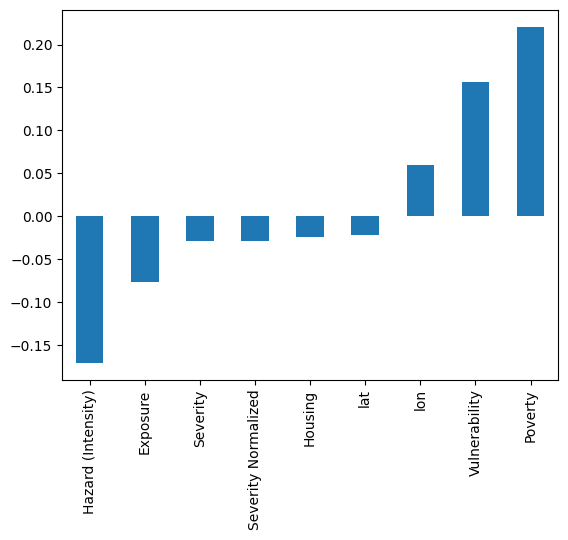

In [49]:
df.corr(numeric_only=True)['severity_cat'][:-1].sort_values().plot(kind='bar')

In [50]:
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'lat', 'lon']
X = df[features].values

In [51]:
from tensorflow.keras.utils import to_categorical

In [52]:
y = y_cat = to_categorical(df['severity_cat'])


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=101)

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [58]:
X_test = scaler.transform(X_test)

In [59]:
from tensorflow.keras.models import Sequential

In [60]:
from tensorflow.keras.layers import Dense, Dropout

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [63]:
X_train.shape

(2789, 7)

In [64]:
model = Sequential()

model.add(Dense(7,activation='relu'))

model.add(Dense(3,activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy')

In [65]:
model.fit(x=X_train,y=y_train,epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8604 - val_loss: 1.7306
Epoch 2/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7087 - val_loss: 1.6530
Epoch 3/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6326 - val_loss: 1.5635
Epoch 4/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5330 - val_loss: 1.4836
Epoch 5/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4713 - val_loss: 1.4229
Epoch 6/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4002 - val_loss: 1.3708
Epoch 7/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3453 - val_loss: 1.3191
Epoch 8/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3292 - val_loss: 1.2583
Epoch 9/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2457 - val_loss: 1.2053
Epoch 10/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2074 - val_loss: 1.1515
Epoch 11/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1572 - val_loss: 1.1056
Epoch 12/600
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0

In [66]:
model_looses = pd.DataFrame(model.history.history)

<Axes: >

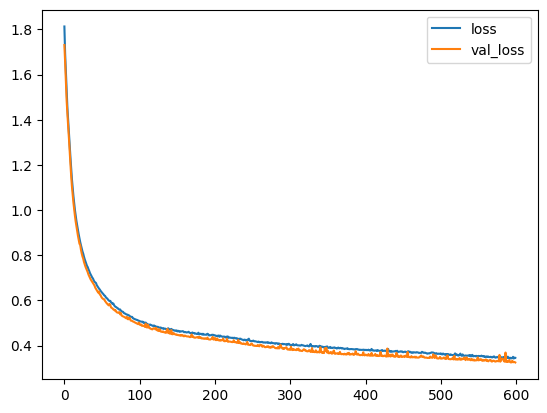

In [67]:
model_looses.plot()

In [68]:
model.evaluate(X_test, y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3446 


0.3256761431694031

In [69]:
y_pred = (model.predict(X_test))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [70]:
from sklearn.metrics import classification_report

In [71]:
# The problem is that y_pred contains probabilities (continuous values from softmax), 
# but classification_report expects class labels (integers or one-hot encoded).
# You need to convert y_pred to class labels first.

import numpy as np

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.63      0.42      0.50        53
           1       0.00      0.00      0.00         6
           2       0.88      0.81      0.84       238
           3       0.97      0.99      0.98       568
           4       0.66      0.87      0.75       137
           5       0.82      0.78      0.80       194

    accuracy                           0.87      1196
   macro avg       0.66      0.64      0.64      1196
weighted avg       0.87      0.87      0.87      1196



c:\Users\megul\Desktop\Test\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\megul\Desktop\Test\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\megul\Desktop\Test\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [73]:
# Remove all preprocessing, NumPy-specific structures
# Make sure model is a pure Keras model
model.save("severity_model_tf_87.keras",)  # This is okay


In [74]:
import tensorflowjs as tfjs

c:\Users\megul\Desktop\Test\env\Lib\site-packages\tensorflowjs\write_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.bool, np.object]


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations